In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
pip install split_folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import zipfile,os
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/IPB/data_Analisis.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/IPB/data_Analisis.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
!apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
!unzip  /content/drive/My Drive/IPB/data_Analisis.zip -d /content/drive/My Drive/IPB/

unzip:  cannot find or open /content/drive/My, /content/drive/My.zip or /content/drive/My.ZIP.


In [ ]:
!ls "/content/drive/My Drive/IPB"


data_Analisis.zip


In [ ]:
!unzip -q "/content/drive/My Drive/IPB/data_Analisis.zip" -d "/content/drive/My Drive/IPB/"

In [ ]:
!ls "/content/drive/My Drive/IPB/DATA/data_hoax"

 101987.jpg   172130.jpg      591356.jpg   672463.png   758765.jpg   872949.png
 103559.jpg   172291.jpg      591484.jpg   673383.png   759839.png   873941.png
 106582.jpg   179775.jpg      596922.jpg   673409.png   760847.jpg   876122.jpg
 109909.jpg   19657.jpg       598233.jpg   680144.png   763231.png   885900.png
 112167.jpg   25064.jpg       600275.png   680578.png   765082.png   886381.jpg
 112665.jpg   27051.jpg       608452.png   687656.jpg   766693.jpg   886572.jpg
 1129.jpg    '33861(1).jpg'   611514.png   689058.jpg   767439.jpg   890193.png
 116636.jpg   33866.jpg       611988.jpg   690192.png   769737.png   892597.jpg
 116656.jpg   35240.jpg       614663.jpg   693499.jpg   770719.png   894936.png
 120016.jpg   42921.jpg       616377.png   697744.png   77235.jpg    895589.png
 123361.jpg   49268.jpg       617172.jpg   698741.png   773285.png   902417.jpg
 127769.jpg   51423.jpg       617970.jpg   703686.jpg   782447.png   902702.jpg
 128800.jpg   527249.png      621383.jpg

In [ ]:
base_dir = '/content/drive/My Drive/IPB/'

#buat train directory
train_dir = os.path.join(base_dir, 'train')

#buat validation directory
validation_dir = os.path.join(base_dir, 'val')

In [ ]:

if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [ ]:
from sklearn.model_selection import train_test_split

hoax_dir = os.path.join('/content/drive/My Drive/IPB/DATA/data_hoax')
real_dir = os.path.join('/content/drive/My Drive/IPB/DATA/data_real')


#memecah directory menjadi train dan validation
train_hoax_dir, val_hoax_dir = train_test_split(os.listdir(hoax_dir), test_size = 0.4 )
train_real_dir, val_real_dir = train_test_split(os.listdir(real_dir), test_size = 0.4 )

In [ ]:
train_hoax = os.path.join(train_dir, 'hoax')
train_real = os.path.join(train_dir, 'real')

val_hoax = os.path.join(validation_dir, 'hoax')
val_real = os.path.join(validation_dir, 'real')



In [ ]:
if not os.path.exists(train_hoax):
    os.mkdir(train_hoax)
if not os.path.exists(train_real):
    os.mkdir(train_real)


if not os.path.exists(val_hoax):
    os.mkdir(val_hoax)
if not os.path.exists(val_real):
    os.mkdir(val_real)


In [ ]:
import shutil

#copy data train ke directory baru
for i in train_hoax_dir:
    shutil.copy(os.path.join(hoax_dir, i), os.path.join(train_hoax, i))
for i in train_real_dir:
    shutil.copy(os.path.join(real_dir, i), os.path.join(train_real, i))

#copy data validation ke directory baru
for i in val_hoax_dir:
    shutil.copy(os.path.join(hoax_dir, i), os.path.join(val_hoax, i))
for i in val_real_dir:
    shutil.copy(os.path.join(real_dir, i), os.path.join(val_real, i))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    shuffle=True,
    batch_size=4,
    #subset='training',
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(100,150),
    # shuffle=False,
    batch_size=4,
    #subset='validation',
    class_mode='binary',
)

Found 194 images belonging to 2 classes.
Found 129 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(28, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
    
)

Epoch 1/20
25/25 - 4s - loss: 0.8840 - accuracy: 0.7857 - val_loss: 0.4352 - val_accuracy: 0.8500
Epoch 2/20
25/25 - 4s - loss: 0.6598 - accuracy: 0.7000 - val_loss: 0.6557 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 4s - loss: 0.5443 - accuracy: 0.7900 - val_loss: 0.5071 - val_accuracy: 0.8000
Epoch 4/20
25/25 - 4s - loss: 0.5979 - accuracy: 0.7143 - val_loss: 0.6161 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 4s - loss: 0.5820 - accuracy: 0.7551 - val_loss: 0.6050 - val_accuracy: 0.7000
Epoch 6/20
25/25 - 4s - loss: 0.5475 - accuracy: 0.7400 - val_loss: 0.5955 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 4s - loss: 0.5184 - accuracy: 0.8100 - val_loss: 0.5017 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 4s - loss: 0.6128 - accuracy: 0.7200 - val_loss: 0.5828 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 4s - loss: 0.5934 - accuracy: 0.7000 - val_loss: 0.4807 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 4s - loss: 0.5017 - accuracy: 0.7755 - val_loss: 0.6226 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

Saving 1129.jpg to 1129.jpg
1129.jpg
Ini adalah hoax


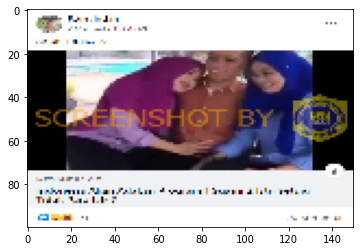

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for ml in uploaded.keys():
    path = ml
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    jenis = model.predict(images, batch_size=10)

    print(ml)
    if jenis==0:
        print('Ini adalah hoax')
    else :
        print('ini bukan hoax')
    